<a href="https://colab.research.google.com/github/c-etulle/Vegetation-dynamics-in-the-Subandean-grasslands-of-Chubut/blob/main/5_MODISvsLandsat_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Content:

* Imports the outputs from MODIS and Landsat NDVI scripts.
* visualizes the NDVI values in the same plot, as NDVI values and as zscores of the NDVI values
* Calculates correlation coefficiens between Landsat and MODIS NDVI values on:
  * Monthly data, that is, every data point
  * Yearly averages, so 12 values for each site
  * Yearly averages averaged over all sites, so one value per year.
* All give similar correlation coefficients around 0.7 - that is, the two datasets are quite similar.
* It does not change much if only pre 2013 or 2013 and up are correlated seperatly.

#1.) Set Up

In [ ]:
#%pip install unidecode # library that transforms special characters
#from unidecode import unidecode

import glob
import os
import numpy as np
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.cluster.hierarchy import linkage, fcluster
#from scipy.spatial.distance import pdist, squareform
#import geopandas as gpd
#from google.colab import files
from google.colab import drive

drive.mount('/content/drive')
%cd /content/drive/My\ Drive/ee-meinzinger-patagonia/Data

path = "landsat-2000-2024"

Mounted at /content/drive
/content/drive/My Drive/ee-meinzinger-patagonia/Data


# Plot settings

In [ ]:
# Settings needed to export the text as actual text in pdf files
from matplotlib import rcParams
# Set to embed fonts fully
rcParams['pdf.fonttype'] = 42  # Type 42 (TrueType fonts) keeps text as text
rcParams['ps.fonttype'] = 42  # Type 42 for PostScript output as well
rcParams['font.family'] = 'DejaVu Sans'



# 2.) Get csv.files

## a) Landsat - import as "combined_df"

Read all csv-files (for different site names) and combine into one data frame

In [ ]:
# find all the files that end with '_NDVI.csv'
csv_files = glob.glob(os.path.join(path, '*_NDVI.csv'))

#print(csv_files)

In [ ]:
# Make a placeholder-list
df_list = []

# Loop through the list of csv-files and read them into dfs
for file in csv_files:
  df = pd.read_csv(file)
  df['Area'] = file # make a new column in the individual df
  df_list.append(df) # indivial dfs are getting "added together"

# Concatenate all dfs into a single df
combined_df = pd.concat(df_list, ignore_index=True)

# Remove random column called .geo
combined_df = combined_df.drop('.geo', axis=1)

# Remove suffix, since it is the same in all of them
combined_df['Area'] = combined_df['Area'].str.replace("_NDVI.csv", '', regex=False)

# Remove prefix, since it is the same in all of them
combined_df['Area'] = combined_df['Area'].str.replace("landsat-2000-2024/", '', regex=False)

# Re-scale NDVI-values
combined_df['NDVI'] = combined_df['NDVI']/10000

# Define month & year as int
combined_df['year'] = combined_df['year'].astype(int)
combined_df['month'] = combined_df['month'].astype(int)

# Adds a column called year_month
combined_df['year_month'] = combined_df['year'].astype(str) + '_' + combined_df['month'].apply(lambda x: f"{x:02d}") #puts a 0 in front of all the months until september

# Show only header
combined_df.head()

,system:index,NDVI,month,year,Area,year_month
0,0,0.0692,1,2000,La Ana,2000_01
1,1,0.0552,2,2000,La Ana,2000_02
2,2,0.0491,3,2000,La Ana,2000_03
3,3,0.0460,4,2000,La Ana,2000_04
4,4,0.0215,5,2000,La Ana,2000_05


## b) MODIS - import as "combined_df_modis"

In [ ]:
path_modis = "modis-2000-2024"

# find all the files that end with '_NDVI.csv'
csv_files_modis = glob.glob(os.path.join(path_modis, '*_NDVI.csv'))

print(csv_files_modis)

['modis-2000-2024/CERM_NDVI.csv', 'modis-2000-2024/Alto Rio Mayo_NDVI.csv', 'modis-2000-2024/1 San Felipe_NDVI.csv', 'modis-2000-2024/2 San Felipe_NDVI.csv', 'modis-2000-2024/Cerro Condor_NDVI.csv', 'modis-2000-2024/La Clara_NDVI.csv', 'modis-2000-2024/Las Piedritas_NDVI.csv', 'modis-2000-2024/La Isabel_NDVI.csv', 'modis-2000-2024/Berna_NDVI.csv', 'modis-2000-2024/San Sebastian_NDVI.csv', 'modis-2000-2024/Bella Vista_NDVI.csv', 'modis-2000-2024/La Regina_NDVI.csv', 'modis-2000-2024/Bahia Cracker_NDVI.csv', 'modis-2000-2024/Chacra Berwyn_NDVI.csv', 'modis-2000-2024/La Payanca_NDVI.csv', 'modis-2000-2024/Los 5 Hermanos_NDVI.csv', 'modis-2000-2024/Cerco de Piedras_NDVI.csv', 'modis-2000-2024/Don Julian_NDVI.csv', 'modis-2000-2024/2 San Jose_NDVI.csv', 'modis-2000-2024/El Moro_NDVI.csv', 'modis-2000-2024/1 San Jose_NDVI.csv', 'modis-2000-2024/Cerro Toro_NDVI.csv', 'modis-2000-2024/La Juanita_NDVI.csv', 'modis-2000-2024/La Portena_NDVI.csv', 'modis-2000-2024/El Castillo_NDVI.csv', 'modis-20

In [ ]:
## Read all csv-files and combine them into one df

# Make a placeholder-list
df_list_modis = []

# Loop through the list of csv-files and read them into dfs
for file in csv_files_modis:
  df = pd.read_csv(file)
  df['Area'] = file # make a new column in the individual df
  df_list_modis.append(df) # indivial dfs are getting "added together"

# Concatenate all dfs into a single df
combined_df_modis = pd.concat(df_list_modis, ignore_index=True)

# Remove random column called .geo
combined_df_modis = combined_df_modis.drop('.geo', axis=1)

# Remove suffix, since it is the same in all of them
combined_df_modis['Area'] = combined_df_modis['Area'].str.replace("_NDVI.csv", '', regex=False)

# Remove prefix, since it is the same in all of them
combined_df_modis['Area'] = combined_df_modis['Area'].str.replace("modis-2000-2024/", '', regex=False)

# Re-scale NDVI-values
combined_df_modis['NDVI'] = combined_df_modis['NDVI']/10000

# Define month & year as int
combined_df_modis['year'] = combined_df_modis['year'].astype(int)
combined_df_modis['month'] = combined_df_modis['month'].astype(int)

# Adds a column called year_month
combined_df_modis['year_month'] = combined_df_modis['year'].astype(str) + '_' + combined_df_modis['month'].apply(lambda x: f"{x:02d}") #puts a 0 in front of all the months until september

# Show only header
combined_df_modis.head()

,system:index,NDVI,month,year,Area,year_month
0,0,NaN,1,2000,CERM,2000_01
1,1,0.15530,2,2000,CERM,2000_02
2,2,0.15225,3,2000,CERM,2000_03
3,3,0.15715,4,2000,CERM,2000_04
4,4,0.15955,5,2000,CERM,2000_05


# 3.) Visualize the NDVI values from Landsat vs MODIS

## 3.1) Landsat - Yearly mean of NDVI for each sample location

In [ ]:
yearly_avg_all_landsat = combined_df\
.groupby(['year', 'Area'])['NDVI']\
.mean()\
.reset_index()

# Add the z-scores
yearly_avg_all_landsat["zscore"] = (yearly_avg_all_landsat["NDVI"] - yearly_avg_all_landsat["NDVI"].mean()) / yearly_avg_all_landsat["NDVI"].std()

# test
print(yearly_avg_all_landsat)

      year                             Area      NDVI    zscore
0     2000                   1 Rio Guenguel  0.038500 -1.640089
1     2000                     1 San Felipe  0.066940 -0.033703
2     2000                       1 San Jose  0.047945 -1.106604
3     2000                   2 Rio Guenguel  0.051894 -0.883526
4     2000                     2 San Felipe  0.062700 -0.273192
...    ...                              ...       ...       ...
2570  2024                      Telleriarte  0.087212  1.111356
2571  2024                            Tureo  0.045569 -1.240823
2572  2024       Valdes Creek Secc La Adela  0.118800  2.895523
2573  2024  Valdes Creek Secc. El Piquillin  0.097119  1.670894
2574  2024                            Yague  0.076706  0.517888

[2575 rows x 4 columns]


## 3.2) MODIS - Yearly mean of NDVI for each sample location

In [ ]:
# Yearly mean of NDVI according to area
yearly_avg_all_modis = combined_df_modis\
.groupby(['year', 'Area'])['NDVI']\
.mean()\
.reset_index()

# Add the z-scores
yearly_avg_all_modis["zscore"] = (yearly_avg_all_modis["NDVI"] - yearly_avg_all_modis["NDVI"].mean()) / yearly_avg_all_modis["NDVI"].std()

# test
print(yearly_avg_all_modis)

      year                             Area      NDVI    zscore
0     2000                   1 Rio Guenguel  0.130950 -1.135067
1     2000                     1 San Felipe  0.180395 -0.216787
2     2000                       1 San Jose  0.149773 -0.785499
3     2000                   2 Rio Guenguel  0.163859 -0.523893
4     2000                     2 San Felipe  0.191486 -0.010811
...    ...                              ...       ...       ...
2570  2024                      Telleriarte       NaN       NaN
2571  2024                            Tureo       NaN       NaN
2572  2024       Valdes Creek Secc La Adela       NaN       NaN
2573  2024  Valdes Creek Secc. El Piquillin       NaN       NaN
2574  2024                            Yague       NaN       NaN

[2575 rows x 4 columns]


## 3.3) Comparison - LS vs. MODIS

### Combine datasets - as "combined_yearly_avg"

Note: MODIS data is for some reason missing in January 2000

In [ ]:
# Combine both datasets
yearly_avg_all_landsat['Source'] = 'Landsat'
yearly_avg_all_modis['Source'] = 'MODIS'
combined_yearly_avg = pd.concat([yearly_avg_all_landsat, yearly_avg_all_modis], ignore_index=True)

combined_yearly_avg

,year,Area,NDVI,zscore,Source
0,2000,1 Rio Guenguel,0.038500,-1.640089,Landsat
1,2000,1 San Felipe,0.066940,-0.033703,Landsat
2,2000,1 San Jose,0.047945,-1.106604,Landsat
3,2000,2 Rio Guenguel,0.051894,-0.883526,Landsat
4,2000,2 San Felipe,0.062700,-0.273192,Landsat
...,...,...,...,...,...
5145,2024,Telleriarte,NaN,NaN,MODIS
5146,2024,Tureo,NaN,NaN,MODIS
5147,2024,Valdes Creek Secc La Adela,NaN,NaN,MODIS
5148,2024,Valdes Creek Secc. El Piquillin,NaN,NaN,MODIS


### Plot NDVI values

In [ ]:
# Disable the max row limit
alt.data_transformers.disable_max_rows()

# Plot the combined chart
base = alt.Chart(combined_yearly_avg).encode(
    x='year:O',
    color='Source:N'  # Differentiate between Landsat and MODIS using color
)

line = base.mark_line().encode(
    y='median(NDVI):Q'
).interactive()

band = base.mark_errorband(extent='iqr').encode(
    y=alt.Y('NDVI:Q', scale=alt.Scale(domain=(0.01, 0.3))),
).interactive()

chart = alt.layer(band, line).properties(width=700, height=300)
chart

alt.LayerChart(...)

### Plot z-scores

In [ ]:
# Disable the max row limit
alt.data_transformers.disable_max_rows()

# Plot the combined chart
base = alt.Chart(combined_yearly_avg).encode(
    x='year:O',
    color='Source:N'  # Differentiate between Landsat and MODIS using color
)

line = base.mark_line().encode(
    y='median(zscore):Q'
).interactive()

band = base.mark_errorband(extent='iqr').encode(
    y=alt.Y('zscore:Q', scale=alt.Scale(domain=(-2, 2))),
).interactive()

chart = alt.layer(band, line).properties(width=700, height=300)
chart

alt.LayerChart(...)

#### PDF version

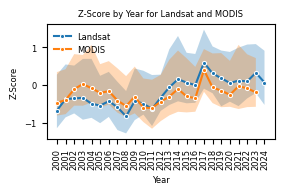

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/Ribbon_plots/MODISvsLandsat.pdf


In [ ]:

# Define the folder to save the plots
save_path = '/content/drive/My Drive/ee-meinzinger-patagonia/Ribbon_plots'
file_path = os.path.join(save_path, f"MODISvsLandsat.pdf")

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Ensure 'year' is a string for categorical x-axis
combined_yearly_avg['year'] = combined_yearly_avg['year'].astype(str)

# Group by 'year' and 'Source' to calculate the required statistics for the plot
grouped_data = combined_yearly_avg.groupby(['year', 'Source'])['zscore'].describe().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(2.9/2.54*2, 2.9/2.54))

# Plot the lines for each source (Landsat and MODIS)
sns.lineplot(data=grouped_data, x='year', y='50%', hue='Source', marker='o', legend='full', markersize = 3)

# Plot the error bands (IQR)
for source in grouped_data['Source'].unique():
    source_data = grouped_data[grouped_data['Source'] == source]
    plt.fill_between(source_data['year'], source_data['25%'], source_data['75%'], alpha=0.3)

# Labels and title with font size 6
plt.title('Z-Score by Year for Landsat and MODIS', fontsize=6)
plt.xlabel('Year', fontsize=6)
plt.ylabel('Z-Score', fontsize=6)

# Rotate the x-axis labels to 90 degrees
plt.xticks(rotation=90, fontsize=6)

# Set font size for y-ticks and legend
plt.yticks(fontsize=6)
ax.legend(loc='upper left', fontsize = 6, frameon=False)


# Remove extra space: explicitly set axes position
ax.set_position([0, 0, 1, 1])  # Fill the entire figure area


# Save plot
plt.show()
fig.savefig(file_path, format='pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.close(fig)
print(f"Figure saved to {file_path}")


# 4.) Correlation between MODIS and Landsat, using the **monthly** data

## 4.1 Combine monthtly dataset - as combined_df_monthly

In [ ]:
# Combine the monthly dataset
combined_df_modis['Source'] = 'MODIS'
combined_df['Source'] = 'Landsat'
combined_monthly = pd.concat([combined_df_modis, combined_df], ignore_index=True)

combined_monthly

,system:index,NDVI,month,year,Area,year_month,Source
0,0,NaN,1,2000,CERM,2000_01,MODIS
1,1,0.15530,2,2000,CERM,2000_02,MODIS
2,2,0.15225,3,2000,CERM,2000_03,MODIS
3,3,0.15715,4,2000,CERM,2000_04,MODIS
4,4,0.15955,5,2000,CERM,2000_05,MODIS
...,...,...,...,...,...,...,...
61795,295,0.09500,8,2024,Media Luna,2024_08,Landsat
61796,296,0.11040,9,2024,Media Luna,2024_09,Landsat
61797,297,NaN,10,2024,Media Luna,2024_10,Landsat
61798,298,NaN,11,2024,Media Luna,2024_11,Landsat


## 4.2) Convert to wide format

In [ ]:
wide_format_df = combined_monthly.pivot_table(
    index=["month", "year", "Area", "year_month"],  # Columns to keep in the wide format
    columns="Source",  # Columns to be created based on unique values in 'Source'
    values="NDVI",  # The values to fill in the new columns
    aggfunc="first"  # Use 'first' if you have unique entries; otherwise, consider other aggregation functions like 'mean'
).reset_index()  # Reset index to get a flat DataFrame structure

# Optional: Rename columns to remove the multi-index created by pivot_table
wide_format_df.columns.name = None

# Remove NAs
wide_format_df = wide_format_df.dropna()

# 1. Calculate the z-scores for 'Landsat'
wide_format_df['Landsat_zscore'] = (wide_format_df['Landsat'] - wide_format_df['Landsat'].mean()) / wide_format_df['Landsat'].std()

# 2. Calculate the z-scores for 'MODIS'
wide_format_df['MODIS_zscore'] = (wide_format_df['MODIS'] - wide_format_df['MODIS'].mean()) / wide_format_df['MODIS'].std()

wide_format_df

,month,year,Area,year_month,Landsat,MODIS,Landsat_zscore,MODIS_zscore
94,1,2001,1 Rio Guenguel,2001_01,0.04445,0.16280,-1.069495,-0.494459
95,1,2001,1 San Felipe,2001_01,0.05835,0.15580,-0.425874,-0.605491
96,1,2001,1 San Jose,2001_01,0.04670,0.13585,-0.965312,-0.921931
97,1,2001,2 Rio Guenguel,2001_01,0.06755,0.22390,0.000120,0.474688
98,1,2001,2 San Felipe,2001_01,0.06380,0.16560,-0.173519,-0.450047
...,...,...,...,...,...,...,...,...
30297,12,2022,Telleriarte,2022_12,0.08070,0.17995,0.609013,-0.222432
30298,12,2022,Tureo,2022_12,0.05450,0.12930,-0.604143,-1.025825
30299,12,2022,Valdes Creek Secc La Adela,2022_12,0.10540,0.24000,1.752714,0.730061
30300,12,2022,Valdes Creek Secc. El Piquillin,2022_12,0.10010,0.19500,1.507304,0.016286


## 4.3) Plot PDF

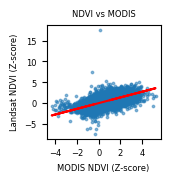

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/MODISvsLandsat/MODISvsLandsat_corScatter.pdf


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Define the folder to save the plots
save_path = '/content/drive/My Drive/ee-meinzinger-patagonia/MODISvsLandsat'
file_path = os.path.join(save_path, "MODISvsLandsat_corScatter.pdf")

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Scatter plot
fig, ax = plt.subplots(figsize=(2.9 / 2.54, 2.9 / 2.54))
ax.scatter(wide_format_df['MODIS_zscore'], wide_format_df['Landsat_zscore'], alpha=0.5, label='Data points', s=3)

# Calculate the line of best fit (linear regression)
slope, intercept = np.polyfit(wide_format_df['MODIS_zscore'], wide_format_df['Landsat_zscore'], 1)
trendline = slope * wide_format_df['MODIS_zscore'] + intercept

# Plot the trendline
ax.plot(wide_format_df['MODIS_zscore'], trendline, color='red', label=f'Trendline (y={slope:.2f}x + {intercept:.2f})')

# Add title and labels
ax.set_title('NDVI vs MODIS', fontsize=6)
ax.set_xlabel('MODIS NDVI (Z-score)', fontsize=6)
ax.set_ylabel('Landsat NDVI (Z-score)', fontsize=6)

# Set tick parameters and increase the number of ticks on the x-axis
ax.tick_params(axis='both', labelsize=6)
ax.xaxis.set_major_locator(MaxNLocator(nbins='auto', prune=None, min_n_ticks=5))

# Display the plot without grid lines and set the axes position to fill the figure
ax.grid(False)
ax.set_position([0, 0, 1, 1])

# Show plot and save the figure
plt.show()
fig.savefig(file_path, format='pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.close(fig)
print(f"Figure saved to {file_path}")


## 4.4) Calculate correlation corefficient

In [ ]:
correlation_MODIS_Landsat = wide_format_df['Landsat'].corr(wide_format_df['MODIS'], method='pearson')
correlation_MODIS_Landsat_pre2013 = wide_format_df['Landsat'][wide_format_df["year"] < 2013].corr(wide_format_df['MODIS'][wide_format_df["year"] < 2013], method='pearson')
correlation_MODIS_Landsat_post2013 = wide_format_df['Landsat'][wide_format_df["year"] >= 2013].corr(wide_format_df['MODIS'][wide_format_df["year"] >= 2013], method='pearson')

print("Overall correlation: " + str(correlation_MODIS_Landsat))
print("pre 2013: " + str(correlation_MODIS_Landsat_pre2013))
print("after 2013: " + str(correlation_MODIS_Landsat_post2013))

Overall correlation: 0.6813926191662556
pre 2013: 0.6731159762734042
after 2013: 0.7022677894165653


# 5.) Correlation between MODIS and Landsat, using the **yearly** averages

## 5.1) Convert the yearly averages ("combined_yearly_avg") to wide format - as "wide_format_yearly"

In [ ]:
wide_format_yearly = combined_yearly_avg.pivot_table(
    index=[ "year", "Area"],  # Columns to keep in the wide format
    columns="Source",  # Columns to be created based on unique values in 'Source'
    values="NDVI",  # The values to fill in the new columns
    aggfunc="first"  # Use 'first' if you have unique entries; otherwise, consider other aggregation functions like 'mean'
).reset_index()  # Reset index to get a flat DataFrame structure

# Optional: Rename columns to remove the multi-index created by pivot_table
wide_format_yearly.columns.name = None

# Remove NAs
wide_format_yearly = wide_format_yearly.dropna()

# 1. Calculate the z-scores for 'Landsat'
wide_format_yearly['Landsat_zscore'] = (wide_format_yearly['Landsat'] - wide_format_yearly['Landsat'].mean()) / wide_format_yearly['Landsat'].std()

# 2. Calculate the z-scores for 'MODIS'
wide_format_yearly['MODIS_zscore'] = (wide_format_yearly['MODIS'] - wide_format_yearly['MODIS'].mean()) / wide_format_yearly['MODIS'].std()

wide_format_yearly

## 5.2) Plot

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))

plt.scatter(wide_format_yearly['MODIS_zscore'], wide_format_yearly['Landsat_zscore'], alpha=0.5, label='Data points')

# Calculate the line of best fit (linear regression)

slope, intercept = np.polyfit(wide_format_yearly['MODIS_zscore'], wide_format_yearly['Landsat_zscore'], 1)

trendline = slope * wide_format_yearly['MODIS_zscore'] + intercept

# Plot the trendline
plt.plot(wide_format_yearly['MODIS_zscore'], trendline, color='red', label=f'Trendline (y={slope:.2f}x + {intercept:.2f})')

# Add title and labels
plt.title('Correlation: NDVI for MODIS and Landsat using average per year')
plt.xlabel('MODIS Z-score')
plt.ylabel('Landsat Z-score')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## 5.3) Calculate correlation coefficient

In [ ]:
correlation_MODIS_Landsat_year = wide_format_yearly['Landsat'].corr(wide_format_yearly['MODIS'], method='pearson')
correlation_MODIS_Landsat_year_pre2013 = wide_format_yearly['Landsat'][wide_format_yearly["year"] < 2013].corr(wide_format_yearly['MODIS'][wide_format_yearly["year"] < 2013], method='pearson')
correlation_MODIS_Landsat_year_post2013 = wide_format_yearly['Landsat'][wide_format_yearly["year"] >= 2013].corr(wide_format_yearly['MODIS'][wide_format_yearly["year"] >= 2013], method='pearson')


print("Overall correlation: " + str(round(correlation_MODIS_Landsat_year,2)))
print("pre 2013: " + str(round(correlation_MODIS_Landsat_year_pre2013,2)))
print("2013 and after: " + str(round(correlation_MODIS_Landsat_year_post2013, 2)))



# 5.) Correlation based on the mean across areas

## 5.1) Calculate averages

In [ ]:
# Group by 'year' and calculate the mean for 'Landsat' and 'MODIS' columns
wide_format_yearly_average = wide_format_yearly.groupby('year')[['Landsat', 'MODIS']].mean().reset_index()

# Remove NAs
wide_format_yearly_average = wide_format_yearly_average.dropna()

# 1. Calculate the z-scores for 'Landsat'
wide_format_yearly_average['Landsat_zscore'] = (wide_format_yearly_average['Landsat'] - wide_format_yearly_average['Landsat'].mean()) / wide_format_yearly_average['Landsat'].std()

# 2. Calculate the z-scores for 'MODIS'
wide_format_yearly_average['MODIS_zscore'] = (wide_format_yearly_average['MODIS'] - wide_format_yearly_average['MODIS'].mean()) / wide_format_yearly_average['MODIS'].std()



# Display the resulting DataFrame with average values
print(wide_format_yearly_average)

## 5.2) Plot

In [ ]:
wide_format_yearly_average

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))

# Separate data based on the year condition
pre_2013 = wide_format_yearly_average[wide_format_yearly_average['year'] < 2013]
post_2013 = wide_format_yearly_average[wide_format_yearly_average['year'] >= 2013]

# Scatter plot for years before 2013 (round markers)
plt.scatter(pre_2013['MODIS_zscore'], pre_2013['Landsat_zscore'], alpha=0.5, label='Before 2013', marker='o')

# Scatter plot for years 2013 and after (square markers)
plt.scatter(post_2013['MODIS_zscore'], post_2013['Landsat_zscore'], alpha=0.5, label='2013 and after', marker='s')

# Calculate the line of best fit (linear regression)
slope, intercept = np.polyfit(wide_format_yearly_average['MODIS_zscore'], wide_format_yearly_average['Landsat_zscore'], 1)
trendline = slope * wide_format_yearly_average['MODIS_zscore'] + intercept

# Plot the trendline
plt.plot(wide_format_yearly_average['MODIS_zscore'], trendline, color='red', label=f'Trendline (y={slope:.2f}x + {intercept:.2f})')

# Add title and labels
plt.title('Correlation: NDVI for MODIS and Landsat using average per year')
plt.xlabel('MODIS Z-score')
plt.ylabel('Landsat Z-score')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


## 5.3) Calculate correlation coefficient

In [ ]:
correlation_MODIS_Landsat_yearlyAverage = wide_format_yearly_average['Landsat'].corr(wide_format_yearly_average['MODIS'], method='pearson')
correlation_MODIS_Landsat_yearlyAverage_pre2013 = wide_format_yearly_average['Landsat'][wide_format_yearly_average["year"] < 2013].corr(wide_format_yearly_average['MODIS'][wide_format_yearly_average["year"] < 2013], method='pearson')
correlation_MODIS_Landsat_yearlyAverage_post2013 = wide_format_yearly_average['Landsat'][wide_format_yearly_average["year"] >= 2013].corr(wide_format_yearly_average['MODIS'][wide_format_yearly_average["year"] >= 2013], method='pearson')

print("Overall correlation", str(round(correlation_MODIS_Landsat_yearlyAverage,3)))
print("pre 2013", str(round(correlation_MODIS_Landsat_yearlyAverage_pre2013,3)))
print("from 2013", str(round(correlation_MODIS_Landsat_yearlyAverage_post2013,3)))